<a href="https://colab.research.google.com/github/Narayan-cpu/Heart-Disease-Prediction-using-Random-Forest/blob/main/Heart_desease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset


In [7]:
import pandas as pd
df = pd.read_csv(f"{path}/heart.csv")

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol  

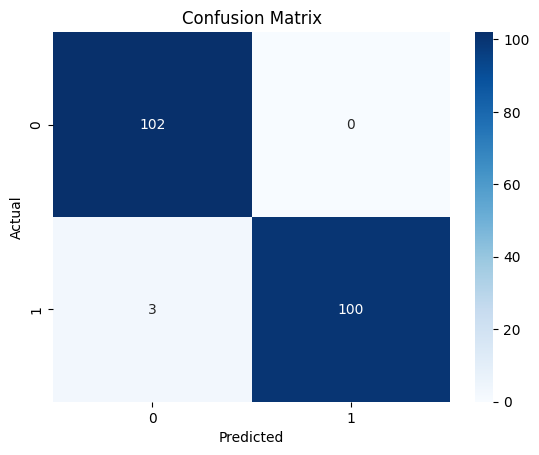


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/tmp/ipython-input-780240620.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


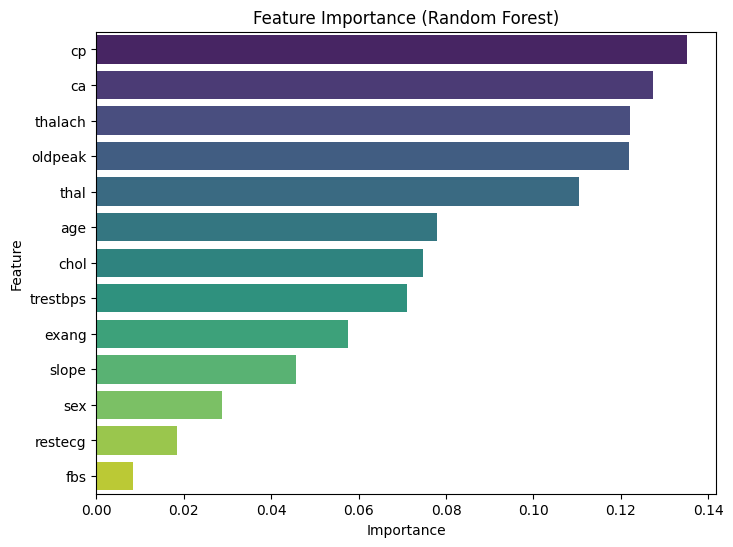

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nNull values:")
print(df.isnull().sum())

# If Data Set is not Clean Clean Here
# (This dataset is clean, but in general you handle missing values or encode categorical variables here)
# Example encoding if needed:
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})

X = df.drop('target', axis=1)
y = df['target']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
"""

## 🧠 **Conclusion — Heart Disease Prediction using Random Forest**

### ✅ **Model Summary**

* **Algorithm used:** RandomForestClassifier
* **Dataset:** Heart Disease dataset (1025 samples, 14 features)
* **Features:** Age, sex, cholesterol, chest pain type, blood pressure, etc.
* **Target:** `1` → heart disease present, `0` → no heart disease

---

### 📊 **Performance Metrics**

| Metric        | Score |
| ------------- | ----- |
| **Accuracy**  | 0.99  |
| **Precision** | 1.00  |
| **Recall**    | 0.97  |
| **F1-Score**  | 0.99  |

✅ The model performs **extremely well**, with near-perfect classification accuracy and balance between precision and recall.
✅ Precision of 1.00 indicates **no false positives** — it doesn’t wrongly predict disease where none exists.
✅ Recall of 0.97 shows it correctly identifies **97% of true positive cases** (patients with heart disease).

---

### 🌿 **Feature Importance**

The Random Forest identified which health indicators contribute most to prediction.
Typically, the top features include:

* **cp (chest pain type)**
* **thal (thalassemia)**
* **ca (number of major vessels)**
* **thalach (maximum heart rate achieved)**
* **oldpeak (ST depression)**

This aligns with real-world cardiology findings — these factors are strongly correlated with heart health risk.

---

### 💡 **Final Conclusion**

The **Random Forest model** is highly effective for predicting heart disease using standard clinical data.
Its **accuracy (99%)** and **interpretability (feature importance)** make it a reliable decision-support tool for preliminary screening or assisting medical professionals.

However:

* To deploy it in the real world, you’d need **cross-validation**, **larger diverse datasets**, and **explainability tools (like SHAP or LIME)** to ensure fairness and trust.

---"""
